
<font size=10 color='blue'>
Proyecto final


## **Predicción de mantenimiento**
El dataset utilizado para entrenar al modelo es [MetroPT-3](https://archive.ics.uci.edu/dataset/791/metropt+3+dataset), el cual consiste de una serie de tiempo multivariable, cuyos datos se obtuvieron de varios sensores analogos y digitales, instalados en el compresor de un tren. Los datos se registraron entre Febrero y Agosto del 2020, estos incluyen quince señales, tales como presiones, corriente del motor y señales eléctricas de la válvulas de admisión de aire.

### **Variables:**
El dataset contiene 1516948 datos por variable y no hay datos faltantes. De los 15 sensores 7 son analogos (1-7) y 8 son digitales (8-15):


1.   TP2 (bar): medición de la presión en el compresor.
2.   TP3 (bar): medición de la presión generada en el panel neumatico.
3.  H1 (bar): medición de la presión generada debido a la caída de presión cuando ocurre la descarga del filtro separador ciclónico.
4.  DV_pressure (bar): medición de la caída de presión generada cuando las torres descargan los secadores de aire; una lectura cero indica que el compresor esta operando bajo carga.
5.  Reservoirs (bar): medición de la presión descendente de los reservorios, la cual debe ser cercana a la presión del panel neumatico.
6.  Motor_Current (A): medición de la corriente en una de las fases de un motor trifásico; los valores son cercanos a 0A cuando se apaga, 4A cuando trabaja descargado, 7A cuando trabaja bajo carga y 9A cuando empieza a trabajar.
7.  Oil_Temperature (°C): medición de la temperatura del aceite en el compresor.
8.  COMP: señal eléctrica de la válvula de entrada de aire del compresor; se activa cuando no hay entrada de aire, indicando que el compresor esta apagado o trabajando en un estado de descarga.
9.  DV_electric: señal eléctrica que controla la válvula de salida del compresor; se activa cuando el compresor esta trabajando bajo carga y se desactiva cuando el compresor esta apagado o trabajando en un estado de descarga.
10. TOWERS: señal eléctrica que define la torre encargada de secar el aire y la torre responsable
para drenar la humedad extraída del aire; cuando esta inactiva, indica que solo una torre esta funcionando; cuando esta activa, indica que dos torres estan funcionando.
11. MPG: señal eléctrica responsable de arrancar el compresor bajo carga, activando la válvula de entrada
cuando la presión en la unidad de producción de aire (APU) cae debajo de 8.2 bares; esta activa el sensor COMP, el cual asume el mismo comportamiento del sensor MPG.
12. LPS: señal electrica que se activa y detecta cuando la presión cae debajo de 7 bares.
13. Pressure_Switch: señal eléctrica que detecta la descarga en la torre de secado de aire.
14. Oil_Level: señal eléctrica que detecta el nivel de aceite en el compresor; se activa cuando el aceite esta por debajo de los valores esperados.
15. Caudal_Impulse: señal eléctrica que cuenta las salidas de pulso generados por la cantidad absoluta de aire que fluye desde APU hasta los reservorios.



*   #### Problema : Tenemos un Dataset que por columna contiene 1516948 datos, donde cada columna corresponde a sensores que corresponden a un compresor de un tren. El problema es poder analizar los datos ofrecidos por los sensores para identificar si se trata de mediciones normales o anormales y en el caso de ser anormales verificar si se ocupa un mantenimiento inmediato.


*   #### Solucion del problema : Se quiere implementar un modelo que realize las predicciones de las mediciones para conocer si todo esta normal o si hay una falla, y con ello saber si la falla ocupa un mantenimiento de inmediato.

#### Buscamos que nuestro modelo pueda predecir lo mas parecido los errores como se observa en esta Tabla, esta Tabla se obtuvo del artículo [Predictive maintenance based on anomaly detection using deep learning for air production unit in the railway industry](https://ieeexplore.ieee.org/document/9564181).


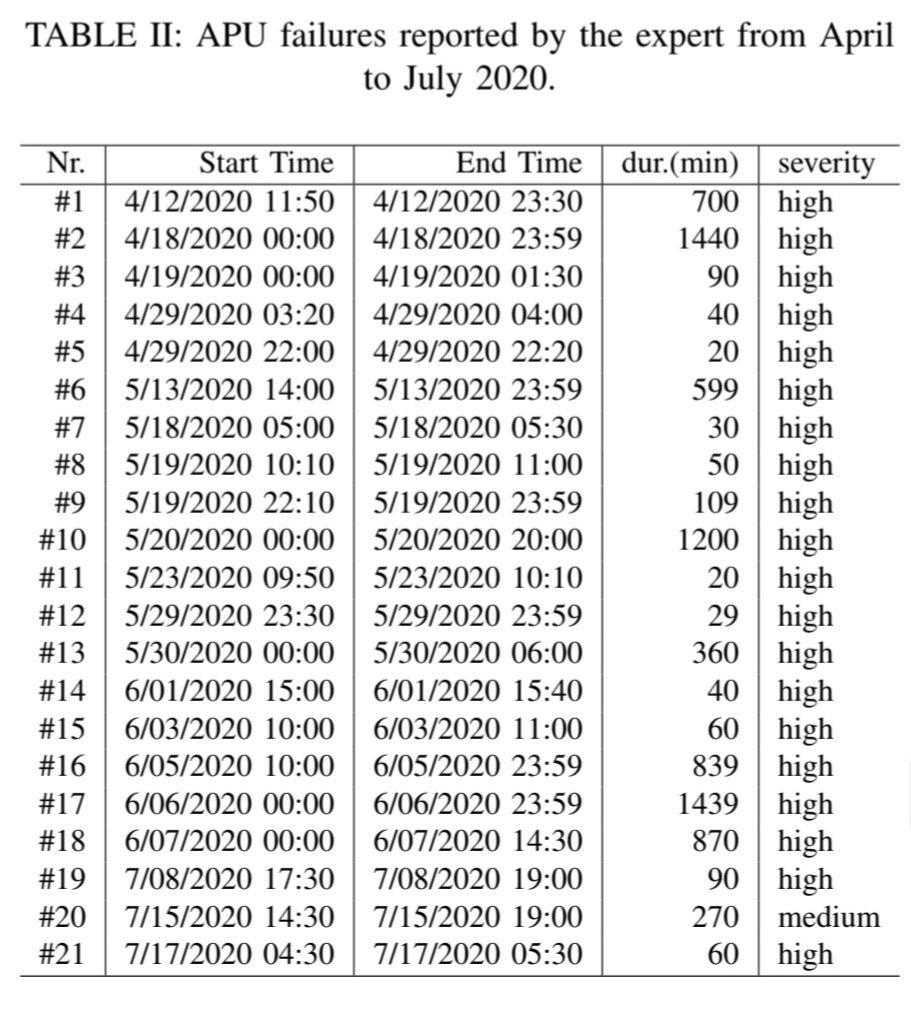

#### Definicion de Librerias

In [ ]:
# librerias para analizar datos

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from scipy.stats import f_oneway, pointbiserialr, chi2_contingency, ttest_ind

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler


from numpy.random import seed
seed(1)

#### Se lee el archivo que .cvs que contiene los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Cargamos el dataset
df = pd.read_csv('/content/drive/MyDrive/Proyecto IA/MetroPT3(AirCompressor).csv', parse_dates=['timestamp'], index_col='timestamp')

In [ ]:
df.head()

,Unnamed: 0,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
timestamp,,,,,,,,,,,,,,,,
2020-02-01 00:00:00,0,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:10,10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:19,20,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:29,30,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:39,40,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


Notamos que nuestro dataframe no contiene una columna de fallas, por lo que se la agregaremos.

In [ ]:
# Creamos una lista de puros ceros
n = 1516948
failure = []
for i in range(n):
    failure.append(0)

In [ ]:
# Colocamos 'unos' en las mediciones anomalas que conocemos
for i in range(n):
  if i >= 525554 and i <= 529796:
    failure[i]=1
  if i >= 562564 and i <= 571777:
    failure[i]=1
  if i >= 632636 and i <= 632883:
    failure[i]=1
  if i >= 639415 and i <= 639541:
    failure[i]=1
  if i >= 729892 and i <= 733523:
    failure[i]=1
  if i >= 761266 and i <= 761448:
    failure[i]=1
  if i >= 770512 and i <= 770819:
    failure[i]=1
  if i >= 774870 and i <= 775535:
    failure[i]=1
  if i >= 775536 and i <= 782728:
    failure[i]=1
  if i >= 800104 and i <= 800230:
    failure[i]=1
  if i >= 840740 and i <= 843100:
    failure[i]=1
  if i >= 862087 and i <= 862334:
    failure[i]=1
  if i >= 874118 and i <= 874486:
    failure[i]=1
  if i >= 890810 and i <= 908124:
    failure[i]=1
  if i >= 1126969 and i <= 1127519:
    failure[i]=1
  if i >= 1171093 and i <= 1172714:
    failure[i]=1
  if i >= 1183446 and i <= 1183755:
    failure[i]=1

Consideramos:
* 0 = Datos normales
* 1 = Datos anormales

In [ ]:
dic ={0:'normal',1:'anormal'}

In [ ]:
len(failure)

1516948

In [ ]:
# Agregamos la lista creada al dataframe
df['Measure'] = failure

In [ ]:
df.head()

,Unnamed: 0,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,Measure
timestamp,,,,,,,,,,,,,,,,,
2020-02-01 00:00:00,0,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-02-01 00:00:10,10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-02-01 00:00:19,20,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-02-01 00:00:29,30,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-02-01 00:00:39,40,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0


#### Revisamos informacion en general de los datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1516948 entries, 2020-02-01 00:00:00 to 2020-09-01 03:59:50
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1516948 non-null  int64  
 1   TP2              1516948 non-null  float64
 2   TP3              1516948 non-null  float64
 3   H1               1516948 non-null  float64
 4   DV_pressure      1516948 non-null  float64
 5   Reservoirs       1516948 non-null  float64
 6   Oil_temperature  1516948 non-null  float64
 7   Motor_current    1516948 non-null  float64
 8   COMP             1516948 non-null  float64
 9   DV_eletric       1516948 non-null  float64
 10  Towers           1516948 non-null  float64
 11  MPG              1516948 non-null  float64
 12  LPS              1516948 non-null  float64
 13  Pressure_switch  1516948 non-null  float64
 14  Oil_level        1516948 non-null  float64
 15  Caudal_impulses  1516948 non-null

In [ ]:
df.describe()

,Unnamed: 0,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,Measure
count,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06
mean,7.584735e+06,1.367826e+00,8.984611e+00,7.568155e+00,5.595619e-02,8.985233e+00,6.264418e+01,2.050171e+00,8.369568e-01,1.606106e-01,9.198483e-01,8.326640e-01,3.420025e-03,9.914368e-01,9.041556e-01,9.371066e-01,3.211514e-02
std,4.379053e+06,3.250930e+00,6.390951e-01,3.333200e+00,3.824015e-01,6.383070e-01,6.516261e+00,2.302053e+00,3.694052e-01,3.671716e-01,2.715280e-01,3.732757e-01,5.838091e-02,9.214078e-02,2.943779e-01,2.427712e-01,1.763059e-01
min,0.000000e+00,-3.200000e-02,7.300000e-01,-3.600000e-02,-3.200000e-02,7.120000e-01,1.540000e+01,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.792368e+06,-1.400000e-02,8.492000e+00,8.254000e+00,-2.200000e-02,8.494000e+00,5.777500e+01,4.000000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,7.584735e+06,-1.200000e-02,8.960000e+00,8.784000e+00,-2.000000e-02,8.960000e+00,6.270000e+01,4.500000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
75%,1.137710e+07,-1.000000e-02,9.492000e+00,9.374000e+00,-1.800000e-02,9.492000e+00,6.725000e+01,3.807500e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
max,1.516947e+07,1.067600e+01,1.030200e+01,1.028800e+01,9.844000e+00,1.030000e+01,8.905000e+01,9.295000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


#### Notamos que la columna 'Unnamed 0' sirve para numerar las mediciones en pasos de 10, por lo que la retiramos sin problemas.

In [ ]:
# Quitamos las columnas que no nos interesan
df = df.loc[:,'TP2':'Measure']

In [ ]:

df

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,Measure
timestamp,,,,,,,,,,,,,,,,
2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01 03:59:10,-0.014,8.918,8.906,-0.022,8.918,59.675,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-09-01 03:59:20,-0.014,8.904,8.888,-0.020,8.904,59.600,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-09-01 03:59:30,-0.014,8.890,8.876,-0.022,8.892,59.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1516948 entries, 2020-02-01 00:00:00 to 2020-09-01 03:59:50
Data columns (total 16 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   TP2              1516948 non-null  float64
 1   TP3              1516948 non-null  float64
 2   H1               1516948 non-null  float64
 3   DV_pressure      1516948 non-null  float64
 4   Reservoirs       1516948 non-null  float64
 5   Oil_temperature  1516948 non-null  float64
 6   Motor_current    1516948 non-null  float64
 7   COMP             1516948 non-null  float64
 8   DV_eletric       1516948 non-null  float64
 9   Towers           1516948 non-null  float64
 10  MPG              1516948 non-null  float64
 11  LPS              1516948 non-null  float64
 12  Pressure_switch  1516948 non-null  float64
 13  Oil_level        1516948 non-null  float64
 14  Caudal_impulses  1516948 non-null  float64
 15  Measure          1516948 non-null

#### Realizamos los Histogramas para cada variable del Dataframe

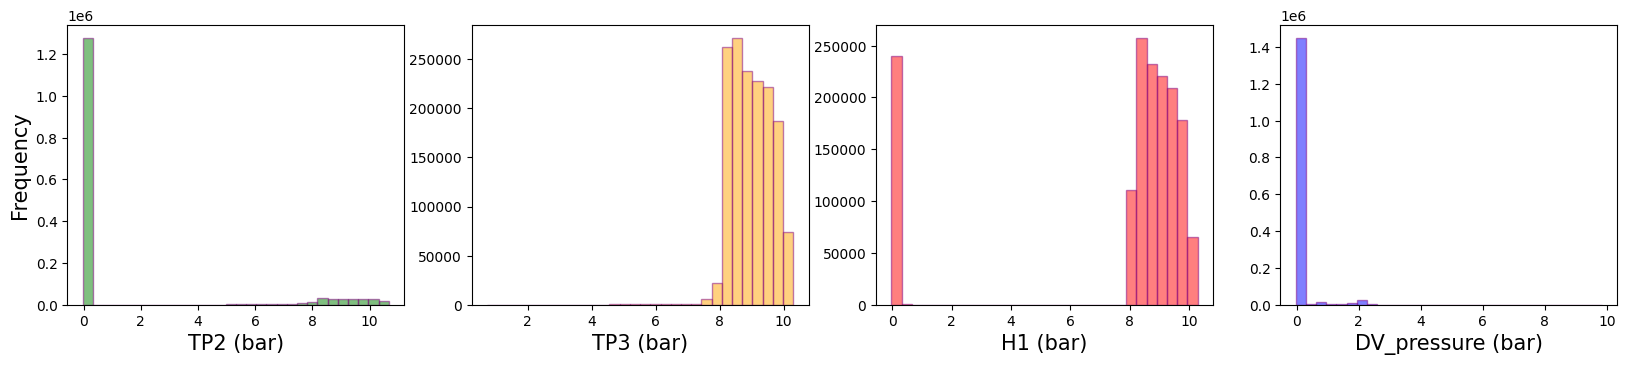

In [ ]:
plt.figure(figsize=(20,8))

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df.TP2, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('TP2 (bar)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.TP3, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('TP3 (bar)', size=15)

ax3.hist(df.H1, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('H1 (bar)', size=15)

ax4.hist(df.DV_pressure, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('DV_pressure (bar)', size=15);

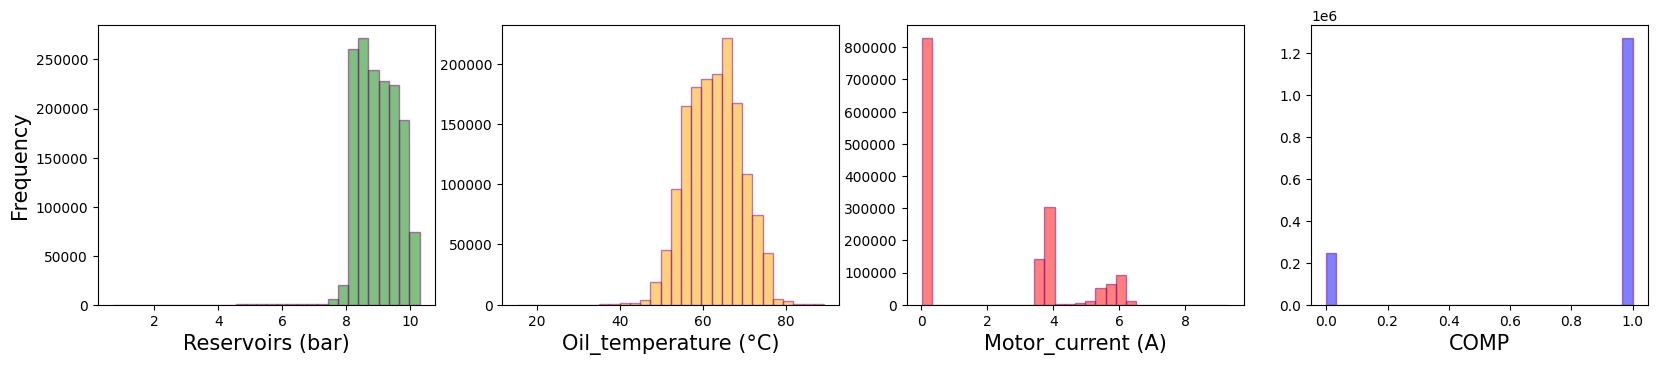

In [ ]:
plt.figure(figsize=(20,8))

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df.Reservoirs, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('Reservoirs (bar)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.Oil_temperature, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('Oil_temperature (°C)', size=15)

ax3.hist(df.Motor_current, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('Motor_current (A)', size=15)

ax4.hist(df.COMP, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('COMP', size=15);

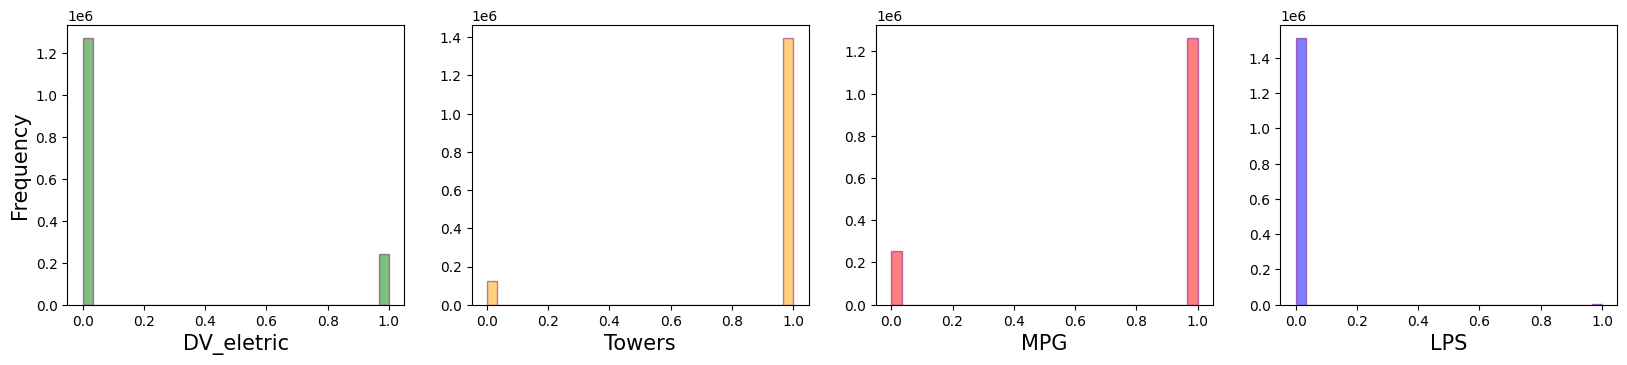

In [ ]:
plt.figure(figsize=(20,8))

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df.DV_eletric, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('DV_eletric', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.Towers, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('Towers', size=15)

ax3.hist(df.MPG, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('MPG', size=15)

ax4.hist(df.LPS, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('LPS', size=15);

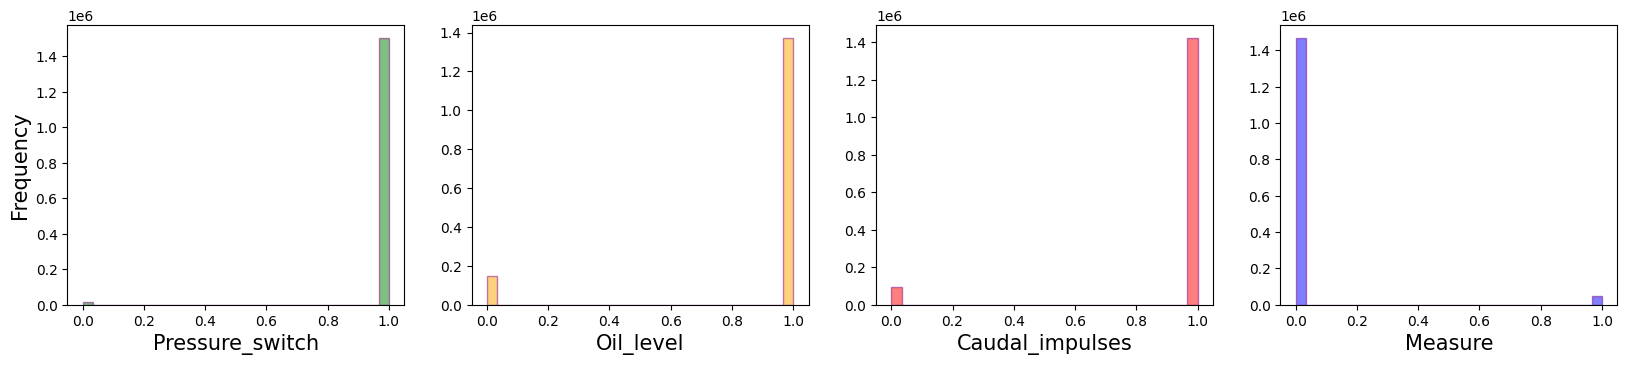

In [ ]:
plt.figure(figsize=(20,8))

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df.Pressure_switch, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('Pressure_switch', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.Oil_level, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('Oil_level', size=15)

ax3.hist(df.Caudal_impulses, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('Caudal_impulses', size=15)

ax4.hist(df.Measure, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('Measure', size=15);

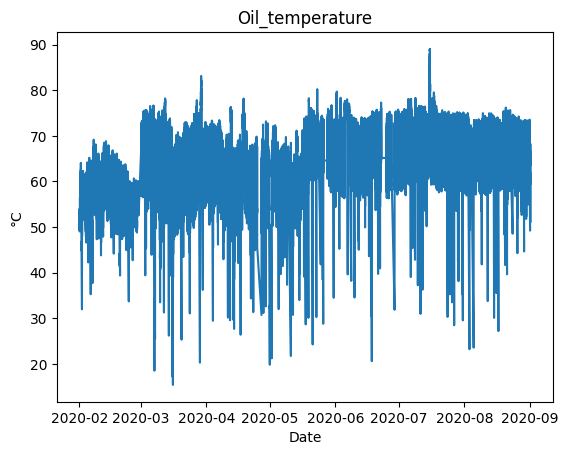

In [ ]:
# Visualizamos una muestra respecto al tiempo
plt.plot( df['Oil_temperature'])
plt.xlabel('Date')
plt.ylabel('°C')
plt.title('Oil_temperature');

In [ ]:
# Revolvemos los datos
df = df.sample(frac = 1,random_state=1)
df

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,Measure
timestamp,,,,,,,,,,,,,,,,
2020-03-25 07:56:36,-0.014,9.054,9.042,-0.024,9.054,60.450,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-07-22 02:51:26,9.734,9.326,-0.012,-0.018,9.322,63.425,6.0150,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0
2020-03-17 07:39:43,-0.014,9.618,9.606,-0.028,9.616,63.175,3.8450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-03-01 14:31:07,-0.010,9.780,9.772,-0.022,9.776,70.150,3.8250,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0
2020-05-25 14:08:35,-0.010,9.516,9.504,-0.018,9.518,68.525,3.7575,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-29 11:47:48,-0.008,9.118,9.104,-0.016,9.118,69.125,3.8050,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-04-07 19:41:58,-0.014,8.682,8.670,-0.022,8.684,56.800,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-04-05 05:12:00,9.236,8.780,-0.016,-0.024,8.774,58.600,5.9100,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0


#### Dividimos nuestro conjunto de datos, en un conjunto de entranamiento y en un conjunto de prueba

In [ ]:
# Separamos el conjunto en un conjunto de entrenamiento y un conjunto de pruebas
test_ratio = 0.1

train_ratio = int((1.0-test_ratio)*len(df.values[:,:]))

df_train1 = df.iloc[0:train_ratio,0:15]
df_train2 = df.iloc[0:train_ratio,15:16]
df_test1  = df.iloc[train_ratio:,0:15]
df_test2 = df.iloc[train_ratio:,15:16]

In [ ]:
df_test2

,Measure
timestamp,
2020-03-25 11:53:11,0
2020-02-18 10:06:15,0
2020-03-09 00:22:22,0
2020-08-17 02:52:55,0
2020-05-05 23:25:55,0
...,...
2020-05-29 11:47:48,0
2020-04-07 19:41:58,0
2020-04-05 05:12:00,0


In [ ]:
# Normalizamos los datos del conjunto de entrenamiento
mu = df_train1.mean()
sigma = df_train1.std()
df_train_norm = (df_train1 - mu)/ sigma
df_train_norm.head()

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
timestamp,,,,,,,,,,,,,,,
2020-03-25 07:56:36,-0.425268,0.108747,0.442408,-0.209285,0.107906,-0.336165,-0.872290,0.441611,-0.437695,0.295288,0.448527,-0.058756,0.092852,0.325377,0.259062
2020-07-22 02:51:26,2.572348,0.534212,-2.272932,-0.193596,0.527631,0.120238,1.721784,-2.264437,2.284694,-3.386519,-2.229516,-0.058756,0.092852,0.325377,0.259062
2020-03-17 07:39:43,-0.425268,0.990961,0.611554,-0.219744,0.988075,0.081885,0.779274,0.441611,-0.437695,0.295288,0.448527,-0.058756,0.092852,0.325377,0.259062
2020-03-01 14:31:07,-0.424038,1.244363,0.661338,-0.204055,1.238657,1.151941,0.770587,0.441611,-0.437695,0.295288,0.448527,-0.058756,0.092852,0.325377,-3.860074
2020-05-25 14:08:35,-0.424038,0.831412,0.580964,-0.193596,0.834594,0.902645,0.741270,0.441611,-0.437695,0.295288,0.448527,-0.058756,0.092852,0.325377,0.259062


In [ ]:
# Normalizamos los datos del conjunto de prueba
df_test_norm = (df_test1 - mu) / sigma
df_test_norm.head()

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
timestamp,,,,,,,,,,,,,,,
2020-03-25 11:53:11,-0.425268,1.313188,0.673934,-0.209285,1.313831,0.799091,0.738012,0.441611,-0.437695,0.295288,0.448527,-0.058756,0.092852,0.325377,0.259062
2020-02-18 10:06:15,-0.425268,0.396562,0.496990,-0.193596,0.402340,-0.746545,-0.874462,0.441611,-0.437695,0.295288,0.448527,-0.058756,0.092852,0.325377,0.259062
2020-03-09 00:22:22,-0.425268,-0.147783,0.393223,-0.214514,-0.155205,-0.804075,-0.872290,0.441611,-0.437695,0.295288,0.448527,-0.058756,0.092852,0.325377,-3.860074
2020-08-17 02:52:55,-0.425268,-0.435598,0.337441,-0.204055,-0.437109,-0.178917,-0.872290,0.441611,-0.437695,0.295288,0.448527,-0.058756,0.092852,0.325377,0.259062
2020-05-05 23:25:55,-0.424653,1.253749,0.661938,-0.204055,1.254318,0.216122,0.782532,0.441611,-0.437695,0.295288,0.448527,-0.058756,0.092852,0.325377,0.259062


In [ ]:
# Definimos las entradas y salidas de los conjuntos de entrenamiento y prueba
train_x = df_train1.values
test_x = df_test1.values
y_train = df_train2.values
y_test = df_test2.values

In [ ]:
# Transformamos la dimension de nuestros conjuntos
x_train = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))
x_test = test_x.reshape((test_x.shape[0], test_x.shape[1], 1))

In [ ]:
x_train.shape

(1365253, 15, 1)

In [ ]:
# Revisamos las dimensiones de nuestros conjuntos
print("Training input shape: ", x_train.shape,y_train.shape)
print("Test input shape: ", x_test.shape,y_test.shape)

Training input shape:  (1365253, 15, 1) (1365253, 1)
Test input shape:  (151695, 15, 1) (151695, 1)


### Modelo
El modelo utilizado es el implementado en el ejemplo de la documentación de Keras, llamado [Timeseries classification from scratch](https://keras.io/examples/timeseries/timeseries_classification_from_scratch/).

In [ ]:
import tensorflow as tf

physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("physical_devices-------------", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

physical_devices------------- 1


In [ ]:
#Revisamos las versiones de ciertas librerias y ademas importamos algunas liberias de mas.
from platform import python_version
import pkg_resources
def version_library(programa):
    return pkg_resources.get_distribution(programa).version
programas=['numpy', 'tensorflow','pydot', 'matplotlib']

import itertools
from itertools import product
for v in product(iter(programas)):
    print(v[0])
    try:
        print(version_library(v[0]))
    except Exception as e: print(e)

numpy
1.23.5
tensorflow
2.14.0
pydot
1.4.2
matplotlib
3.7.1


In [ ]:
#Importamos mas liberias para llevar acabo nuestro modelo
import numpy as np

#import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD, Adam

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import pickle


np.random.seed(1)

In [ ]:
strategy = tf.distribute.MirroredStrategy()
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

Number of devices: 1


In [ ]:
# Definimos la arquitectura que utilizaremos
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(2, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


with strategy.scope():
    model = make_model(input_shape=x_train.shape[1:])



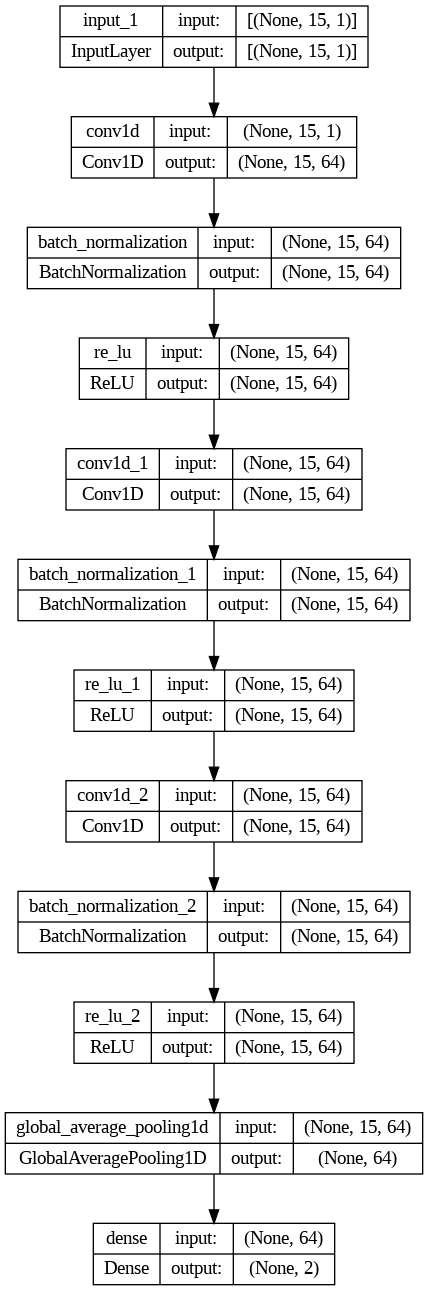

In [ ]:
# Visualizamos el modelo
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# Vemos un resumen de nuestro modelo
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 15, 64)            256       
                                                                 
 batch_normalization (Batch  (None, 15, 64)            256       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 15, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 64)            12352     
                                                                 
 batch_normalization_1 (Bat  (None, 15, 64)            256       
 chNormalization)                                            

#### Se utilizaron capas convolucionales para poder detectar los patrones locales y caracteristicas locales de nuestro conjunto de datos. Y a partir de esto poder clasificar los datos.  

In [ ]:
# Compilamos el modelo
epochs = 20
batch_size = 32


model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

In [ ]:
# Realizamos el entrenamiento
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/20
34132/34132 [==============================] - 239s 7ms/step - loss: 0.0121 - sparse_categorical_accuracy: 0.9969 - val_loss: 0.0101 - val_sparse_categorical_accuracy: 0.9977
Epoch 2/20
34132/34132 [==============================] - 236s 7ms/step - loss: 0.0091 - sparse_categorical_accuracy: 0.9979 - val_loss: 0.0107 - val_sparse_categorical_accuracy: 0.9975
Epoch 3/20
34132/34132 [==============================] - 234s 7ms/step - loss: 0.0088 - sparse_categorical_accuracy: 0.9979 - val_loss: 0.0099 - val_sparse_categorical_accuracy: 0.9976
Epoch 4/20
34132/34132 [==============================] - 235s 7ms/step - loss: 0.0087 - sparse_categorical_accuracy: 0.9980 - val_loss: 0.0086 - val_sparse_categorical_accuracy: 0.9979
Epoch 5/20
34132/34132 [==============================] - 237s 7ms/step - loss: 0.0086 - sparse_categorical_accuracy: 0.9979 - val_loss: 0.0092 - val_sparse_categorical_accuracy: 0.9977
Epoch 6/20
34132/34132 [==============================] - 237s 7ms/ste

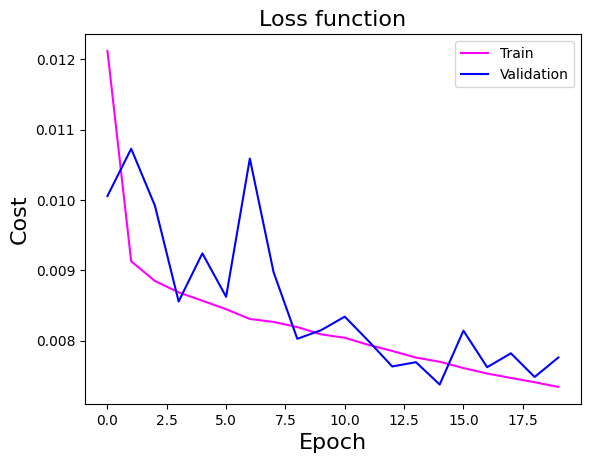

In [ ]:
# Graficamos
plt.plot(history.history['loss'], 'magenta')
plt.plot(history.history['val_loss'], 'blue')
plt.title('Loss function', size=16)
plt.ylabel('Cost', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['Train', 'Validation'], loc='upper right');

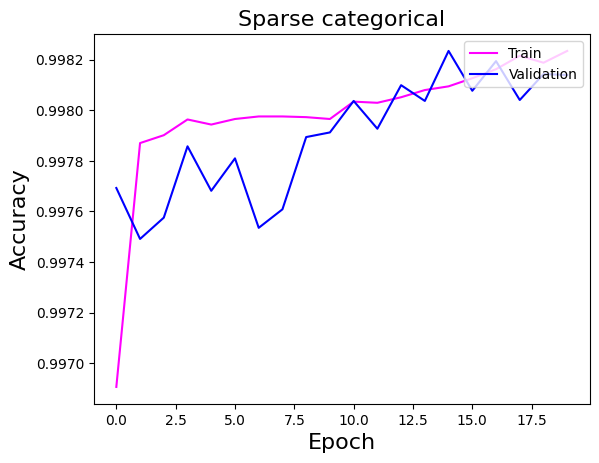

In [ ]:
# Graficamos
plt.plot(history.history['sparse_categorical_accuracy'], 'magenta')
plt.plot(history.history['val_sparse_categorical_accuracy'], 'blue')
plt.title('Sparse categorical', size=16)
plt.ylabel('Accuracy', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['Train', 'Validation'], loc='upper right');

In [ ]:
# Hacemos las pruebas a nuestro modelo
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)


4741/4741 [==============================] - 15s 3ms/step - loss: 0.0074 - sparse_categorical_accuracy: 0.9981
Test accuracy 0.9981409907341003
Test loss 0.007440576329827309


In [ ]:
# Obtenemos las predicciones
predictions = model.predict(x_test)

4741/4741 [==============================] - 11s 2ms/step


In [ ]:
print(type(predictions))
print(predictions.shape)
predictions

<class 'numpy.ndarray'>
(151695, 2)


array([[9.9968493e-01, 3.1514929e-04],
       [9.9996233e-01, 3.7722435e-05],
       [9.9999619e-01, 3.7988937e-06],
       ...,
       [9.9994433e-01, 5.5718421e-05],
       [9.9996090e-01, 3.9109687e-05],
       [9.9990189e-01, 9.8096505e-05]], dtype=float32)

In [ ]:
# Imprimimos la prediccion para una muestra
sample = 151641
prediction = np.argmax(predictions[sample])
print("Prediction number=", prediction,'corresponds to a(an)', dic[prediction],'measure')

Prediction number= 0 corresponds to a(an) normal measure


In [ ]:
# Obtenemos los índices de mediciones normales y anormales, ya conocidas
unos = np.where(y_test==1)[0]
ceros = np.where(y_test==0)[0]

In [ ]:
# Comparamos las mediciones anomalas conocidas con las predicciones
for i in range(0,len(unos)-5,4):
  print('Index:', unos[i], 'anormal:',np.argmax(predictions[unos[i]])==1,
        '|','Index:', unos[i+1], 'anormal:',np.argmax(predictions[unos[i+1]])==1,
        '|','Index:', unos[i+2], 'anormal:',np.argmax(predictions[unos[i+2]])==1,
        '|','Index:', unos[i+3], 'anormal:',np.argmax(predictions[unos[i+3]])==1,
        '|','Index:', unos[i+4], 'anormal:',np.argmax(predictions[unos[i+4]])==1)

Index: 28 anormal: True | Index: 45 anormal: True | Index: 54 anormal: True | Index: 84 anormal: True | Index: 88 anormal: True
Index: 88 anormal: True | Index: 160 anormal: True | Index: 164 anormal: True | Index: 216 anormal: True | Index: 218 anormal: True
Index: 218 anormal: True | Index: 236 anormal: True | Index: 261 anormal: True | Index: 279 anormal: True | Index: 308 anormal: True
Index: 308 anormal: True | Index: 313 anormal: True | Index: 331 anormal: True | Index: 357 anormal: True | Index: 368 anormal: True
Index: 368 anormal: True | Index: 375 anormal: True | Index: 480 anormal: True | Index: 482 anormal: True | Index: 504 anormal: True
Index: 504 anormal: True | Index: 508 anormal: True | Index: 512 anormal: True | Index: 545 anormal: True | Index: 561 anormal: True
Index: 561 anormal: True | Index: 566 anormal: True | Index: 580 anormal: True | Index: 612 anormal: True | Index: 629 anormal: True
Index: 629 anormal: True | Index: 635 anormal: True | Index: 643 anormal: F

In [ ]:
# Comparamos las mediciones normales conocidas con las predicciones
for i in range(0,len(ceros)-5,4):
  print('Index:', ceros[i], 'normal:',np.argmax(predictions[ceros[i]])==0,
        '|','Index:', ceros[i+1], 'normal:',np.argmax(predictions[ceros[i+1]])==0,
        '|','Index:', ceros[i+2], 'normal:',np.argmax(predictions[ceros[i+2]])==0,
        '|','Index:', ceros[i+3], 'normal:',np.argmax(predictions[ceros[i+3]])==0,
        '|','Index:', ceros[i+4], 'normal:',np.argmax(predictions[ceros[i+4]])==0)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Index: 131025 normal: True | Index: 131026 normal: True | Index: 131027 normal: True | Index: 131028 normal: True | Index: 131030 normal: True
Index: 131030 normal: True | Index: 131031 normal: True | Index: 131032 normal: True | Index: 131034 normal: True | Index: 131035 normal: True
Index: 131035 normal: True | Index: 131036 normal: True | Index: 131037 normal: True | Index: 131038 normal: True | Index: 131039 normal: True
Index: 131039 normal: True | Index: 131041 normal: True | Index: 131042 normal: True | Index: 131043 normal: True | Index: 131044 normal: True
Index: 131044 normal: True | Index: 131045 normal: True | Index: 131046 normal: True | Index: 131047 normal: True | Index: 131048 normal: True
Index: 131048 normal: True | Index: 131049 normal: True | Index: 131050 normal: True | Index: 131051 normal: True | Index: 131052 normal: True
Index: 131052 normal: True | Index: 131054 normal: True | Index: 131055 nor